In [121]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import datetime
import matplotlib as mpl
import pandas as pd
import scipy.stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

import uncertainties.unumpy as unp
from pylab import *

In [61]:
x = ['2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02', '2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
    '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
    '2019-01', '2019-02', '2019-03', '2019-04' ]

# Font size
font_setting = {'family':'Times New Roman', 'weight':'normal', 'size':23}

In [46]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
    dist = NormalDist.from_samples(data)
    z = NormalDist().inv_cdf((1 + confidence) / 2.)
    h = dist.stdev * z / ((len(data) - 1) ** .5)
    return dist.mean - h, dist.mean + h

ImportError: cannot import name 'NormalDist' from 'statistics' (/home/centos/anaconda3/envs/yijun/lib/python3.7/statistics.py)

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

In [5]:
def linearRegression(x, A, B):
    return A*x + B

In [153]:
# Regression line
length_of_section_1 = 5+9
length_of_section_2 = length_of_section_1+12
length_of_section_3 = length_of_section_2+7
length_of_section_4 = length_of_section_3+4
x_number_section_1 = [i for i in range(0,length_of_section_1)]
x_number_section_2 = [i for i in range(length_of_section_1, length_of_section_2)]
x_number_section_3 = [i for i in range(length_of_section_2, length_of_section_3)]
x_number_section_4 = [i for i in range(length_of_section_3, length_of_section_4)]

from scipy.stats import ttest_ind_from_stats
# from scipy.stats import linregress
def drawRegressionLine_four_section(y, color):
#     print('y: ', y)
#     print('section 1: ', y[:length_of_section_1])
#     print('section 2: ', y[length_of_section_1:length_of_section_2])
#     print('section 3: ', y[length_of_section_2:length_of_section_3])
#     print('section 4: ', y[length_of_section_3:length_of_section_4])
#     print('--------------------------')
    
    # section 1
#     A_section_1, B_section_1 = optimize.curve_fit(linearRegression, x_number_section_1, y[:length_of_section_1])[0]
    popt_1, pcov_1 = optimize.curve_fit(linearRegression, x_number_section_1, y[:length_of_section_1])
    A_section_1, B_section_1 = popt_1
    x_plot_section_1 = np.arange(0, length_of_section_1, 0.01)
    y_plot_section_1 = A_section_1 * x_plot_section_1 + B_section_1
    plt.plot(x_plot_section_1, y_plot_section_1, color+'-') # , label='Users' is useless
    
    # Confidence Interval
    
    # approach 1
#     mean_1, upper_bound_1, lower_bound_1 = mean_confidence_interval(y[:length_of_section_1])
#     print('mean_1: ', mean_1)
#     print(upper_bound_1)
#     print(lower_bound_1)
# #     plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None)
#     plot_mean_and_CI(np.asarray(y[:length_of_section_1]), upper_bound_1, lower_bound_1, color_mean='b', color_shading='b')
    
    # Approach 2
#     # now calculate confidence intervals for new test x-series
#     mean_x_1 = np.mean(x_number_section_1)         # mean of x
#     n_1 = len(x_number_section_1)              # number of samples in origional fit
#     t = 2.31                # appropriate t value (where n=9, two tailed 95%)
#     s_err_1 = np.sum(np.power(y_err,2))   # sum of the squares of the residuals
#     confs_1 = t * np.sqrt((s_err_1/(n_1-2))*(1.0/n_1 + (np.power((x_plot_section_1-mean_x_1),2)/
#                 ((np.sum(np.power(x_number_section_1,2)))-n_1*(np.power(mean_x_1,2))))))
# #     confs_1 = t * np.sqrt((s_err_1/(n_1-2)))*(1 + 1.0/n_1 + np.power((x_plot_section_1-mean_x_1),2)/
# #             (np.sum(np.power(x_number_section_1-mean_x_1, 2))))
    
#     print('confs_1: ', confs_1)
#     print('length of confs_1: ', len(confs_1))
#     # get lower and upper confidence limits based on predicted y and confidence intervals
#     lower_bound_1 = y_plot_section_1 - abs(confs_1)
#     upper_bound_1 = y_plot_section_1 + abs(confs_1)
#     # plot confidence limits
#     plt.plot(x_plot_section_1, lower_bound_1,'b--',label='Lower confidence limit (95%)')
#     plt.plot(x_plot_section_1, upper_bound_1,'b--',label='Upper confidence limit (95%)')
    
    # approach 3
#     res = sm.OLS(y[:length_of_section_1], x_number_section_1).fit()
#     st, data, ss2 = summary_table(res, alpha=0.05)
#     fittedvalues = data[:,2]
#     print('fittedvalues: ', fittedvalues)
#     predict_mean_se  = data[:,3]
#     predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
#     predict_ci_low, predict_ci_upp = data[:,6:8].T
#     ax.plot(x_number_section_1, fittedvalues, 'r-', label='OLS')
#     ax.plot(x_number_section_1, predict_ci_low, 'b--')
#     ax.plot(x_number_section_1, predict_ci_upp, 'b--')
#     ax.plot(x_number_section_1, predict_mean_ci_low, 'g--')
#     ax.plot(x_number_section_1, predict_mean_ci_upp, 'g--')
#     ax.legend(loc='best')
    
    # approach 4: maybe prediction interval?
#     temp_y_list = A_section_1 * np.asarray(x_number_section_1) + B_section_1
#     print('temp_y_list: ', temp_y_list)
#     stdev_1 = np.sqrt(sum((temp_y_list-y[:length_of_section_1])**2) / (len(y[:length_of_section_1])-2))
#     plt.plot(x_plot_section_1, y_plot_section_1-1.96*stdev_1,'b--',label='Lower confidence limit (95%)')
    
    # approach 5
#     nom_1 = unp.nominal_values(y_plot_section_1)
#     std_1 = unp.std_devs(y_plot_section_1)
#     print('nom_1: ', nom_1)
#     print('std_1: ', std_1)
#     plt.plot(x_plot_section_1, nom_1 - 1.96 * std_1, c='orange', label='95% Confidence Region')
#     plt.plot(x_plot_section_1, nom_1 + 1.96 * std_1, c='orange')
    
    # approach 6
#     lower = percentile(y_plot_section_1, 2.5, axis=0)
#     print('lower: ', lower)
#     plt.plot(x_plot_section_1, lower, c='orange')
    
    # approach 7
    perr_1 = np.sqrt(np.diag(pcov_1))
    dof = max(0, len(x_number_section_1) - len(popt_1))
    tval = scipy.stats.t.ppf(1.0-0.05/2., dof)
#     bound_upper = linearRegression(x_plot_section_1, *(popt_1 + tval*perr_1))
#     bound_lower = linearRegression(x_plot_section_1, *(popt_1 - tval*perr_1))
    bound_upper = linearRegression(x_plot_section_1, *(popt_1 + perr_1))
    bound_lower = linearRegression(x_plot_section_1, *(popt_1 - perr_1))
    print('bound_upper: ', bound_upper)
    
    plt.plot(x_plot_section_1, bound_upper, c='orange')
    plt.plot(x_plot_section_1, bound_lower, c='orange')
    
    
    
    
    
    
    
    
    
    
    
    
    
    # Calculate the R square
    residuals_1 = y[:length_of_section_1]- linearRegression(np.asarray(x_number_section_1), *[float(A_section_1), float(B_section_1)])
    ss_res_1 = np.sum(residuals_1**2)
    ss_tot_1 = np.sum((y[:length_of_section_1]-np.mean(y[:length_of_section_1]))**2)
    r_squared_1 = 1 - (ss_res_1 / ss_tot_1) 
    
    
#     tmp = linregress()
    
    # section 2: length_of_section_1-1:length_of_section_2
    popt_2, pcov_2 = optimize.curve_fit(linearRegression, x_number_section_2, y[length_of_section_1:length_of_section_2])
    A_section_2, B_section_2 = popt_2
#     A_section_2, B_section_2 = optimize.curve_fit(linearRegression, x_number_section_2, y[length_of_section_1-1:length_of_section_2])[0]
    x_plot_section_2 = np.arange(length_of_section_1, length_of_section_2, 0.01)
    y_plot_section_2 = A_section_2 * x_plot_section_2 + B_section_2
    plt.plot(x_plot_section_2, y_plot_section_2, color+'-')
    # Calculate the R square
    residuals_2 = y[length_of_section_1:length_of_section_2]- linearRegression(np.asarray(x_number_section_2), *[float(A_section_2), float(B_section_2)])
    ss_res_2 = np.sum(residuals_2**2)
    ss_tot_2 = np.sum((y[length_of_section_1:length_of_section_2]-np.mean(y[length_of_section_1:length_of_section_2]))**2)
    r_squared_2 = 1 - (ss_res_2 / ss_tot_2)

    # section 3: length_of_section_2-1:length_of_section_3
    popt_3, pcov_3 = optimize.curve_fit(linearRegression, x_number_section_3, y[length_of_section_2:length_of_section_3])
    A_section_3, B_section_3 = popt_3
#     A_section_3, B_section_3 = optimize.curve_fit(linearRegression, x_number_section_3, y[length_of_section_2:length_of_section_3])[0]
    x_plot_section_3 = np.arange(length_of_section_2, length_of_section_3, 0.01)
    y_plot_section_3 = A_section_3 * x_plot_section_3 + B_section_3
    plt.plot(x_plot_section_3, y_plot_section_3, color+'-')
    # Calculate the R square
    residuals_3 = y[length_of_section_2:length_of_section_3]- linearRegression(np.asarray(x_number_section_3), *[float(A_section_3), float(B_section_3)])
    ss_res_3 = np.sum(residuals_3**2)
    ss_tot_3 = np.sum((y[length_of_section_2:length_of_section_3]-np.mean(y[length_of_section_2:length_of_section_3]))**2)
    r_squared_3 = 1 - (ss_res_3 / ss_tot_3)

    # section 4: length_of_section_3-1:length_of_section_4
    popt_4, pcov_4 = optimize.curve_fit(linearRegression, x_number_section_4, y[length_of_section_3:length_of_section_4])
    A_section_4, B_section_4 = popt_4
#     A_section_4, B_section_4 = optimize.curve_fit(linearRegression, x_number_section_4, y[length_of_section_3:length_of_section_4])[0]
    x_plot_section_4 = np.arange(length_of_section_3, length_of_section_4-1, 0.01)
    y_plot_section_4 = A_section_4 * x_plot_section_4 + B_section_4
    plt.plot(x_plot_section_4, y_plot_section_4, color+'-')
    # Calculate the R square
    residuals_4 = y[length_of_section_3:length_of_section_4]- linearRegression(np.asarray(x_number_section_4), *[float(A_section_4), float(B_section_4)])
    ss_res_4 = np.sum(residuals_4**2)
    ss_tot_4 = np.sum((y[length_of_section_3:length_of_section_4]-np.mean(y[length_of_section_3:length_of_section_4]))**2)
    r_squared_4 = 1 - (ss_res_4 / ss_tot_4)
    
    # Calculate the mean value.
    mean_1 = float('%.2f' % np.mean(y[:length_of_section_1]))
    mean_2 = float('%.2f' % np.mean(y[length_of_section_1:length_of_section_2]))
    mean_3 = float('%.2f' % np.mean(y[length_of_section_2:length_of_section_3]))
    mean_4 = float('%.2f' % np.mean(y[length_of_section_3:length_of_section_4]))
    
    print('Mean value in different stage: ', [mean_1,mean_2,mean_3,mean_4])
    print('slope: ', [A_section_1, A_section_2, A_section_3, A_section_4])
    print('intercept: ', [B_section_1, B_section_2, B_section_3, B_section_4])
    print('R^2: ', [r_squared_1, r_squared_2, r_squared_3, r_squared_4])
    
    
    # t-test
#     print('popt_1: ', popt_1)
#     print('pcov_1: ', pcov_1)
    
    perr_1 = np.sqrt(np.diag(pcov_1))
    perr_slope_1 = perr_1[0]
    perr_intercept_1 = perr_1[1]
    
    perr_2 = np.sqrt(np.diag(pcov_2))
    perr_slope_2 = perr_2[0]
    perr_intercept_2 = perr_2[1]
    
    perr_3 = np.sqrt(np.diag(pcov_3))
    perr_slope_3 = perr_3[0]
    perr_intercept_3 = perr_3[1]
    
    perr_4 = np.sqrt(np.diag(pcov_4))
    perr_slope_4 = perr_4[0]
    perr_intercept_4 = perr_4[1]
    
#     print('perr_slope_1: ', perr_slope_1)
#     print('perr_slope_2: ', perr_slope_2)
#     print('length_of_section_1: ', length_of_section_1)
#     print('length_of_section_2-length_of_section_1: ', length_of_section_2-length_of_section_1)
    tTest_slope_1 = ttest_ind_from_stats(A_section_1, perr_slope_1, length_of_section_1, A_section_2, perr_slope_2, length_of_section_2-length_of_section_1)
    tTest_intercept_1 = ttest_ind_from_stats(B_section_1, perr_intercept_1, length_of_section_1, B_section_2, perr_intercept_2, length_of_section_2-length_of_section_1)
#     print('tTest_slope_1: ', tTest_slope_1)
#     print('tTest_intercept_1: ', tTest_intercept_1)
    
    tTest_slope_2 = ttest_ind_from_stats(A_section_2, perr_slope_2, length_of_section_2, A_section_3, perr_slope_3, length_of_section_3-length_of_section_2)
    tTest_intercept_2 = ttest_ind_from_stats(B_section_2, perr_intercept_2, length_of_section_2, B_section_3, perr_intercept_3, length_of_section_3-length_of_section_2)
#     print('tTest_slope_2: ', tTest_slope_2)
#     print('tTest_intercept_2: ', tTest_intercept_2)
    
    tTest_slope_3 = ttest_ind_from_stats(A_section_3, perr_slope_3, length_of_section_3, A_section_4, perr_slope_4, length_of_section_4-length_of_section_3)
    tTest_intercept_3 = ttest_ind_from_stats(B_section_3, perr_intercept_3, length_of_section_3, B_section_4, perr_intercept_4, length_of_section_4-length_of_section_3)
#     print('tTest_slope_3: ', tTest_slope_3)
#     print('tTest_intercept_3: ', tTest_intercept_3)
    
    print('t-test: ')
    print('slope- T value: ', [tTest_slope_1[0], tTest_slope_2[0], tTest_slope_3[0]])
    print('slope- p value: ', [tTest_slope_1[1], tTest_slope_2[1], tTest_slope_3[1]])
    print('intercept- T value: ', [tTest_intercept_1[0], tTest_intercept_2[0], tTest_intercept_3[0]])
    print('intercept- p value: ', [tTest_intercept_1[1], tTest_intercept_2[1], tTest_intercept_3[1]])
    print()

## ecig

In [154]:
# SF_allECigarette
SF_allECigarette_2016 = [132, 148, 127, 139, 107, 128, 119, 115, 127]
SF_allECigarette_2017 = [59,65,90,59,67,88,74,89,47,50,76,122]
SF_allECigarette_2018 = [111,103,102,99,81,92,127,106,92,83,141,113]
SF_allECigarette_2019 = [130,105,74,92]
SF_allECigarette_total = []
SF_allECigarette_total.extend(SF_allECigarette_2016)
SF_allECigarette_total.extend(SF_allECigarette_2017)
SF_allECigarette_total.extend(SF_allECigarette_2018)
SF_allECigarette_total.extend(SF_allECigarette_2019)
print('length of SF_allECigarette_total: ', len(SF_allECigarette_total))

# allSF
allSF_2016 = [395757, 421225, 442983, 414926, 427931, 384324, 445447, 422048, 353848]
allSF_2017 = [404518, 350143, 358222, 326842, 326461, 332603, 312882, 323315, 148187, 205925, 296740, 257645]
allSF_2018 = [278884, 259869, 304292, 278291, 287698, 282691, 287065, 262239, 284484, 244884, 264046, 245877]
allSF_2019 = [274852, 253351, 225549, 252680]
allSF_total = []
allSF_total.extend(allSF_2016)
allSF_total.extend(allSF_2017)
allSF_total.extend(allSF_2018)
allSF_total.extend(allSF_2019)
print('length of allSF_total: ', len(allSF_total))

propotion_SF_ecig_in_all_SF_tweets = []
# propotion of SF e-cig tweets in all SF tweets.
for i in range(37):
    propotion_SF_ecig_in_all_SF_tweets.append((SF_allECigarette_total[i]/allSF_total[i])*100)
print('length of propotion_SF_ecig_in_all_SF_tweets: ', len(propotion_SF_ecig_in_all_SF_tweets))

length of SF_allECigarette_total:  37
length of allSF_total:  37
length of propotion_SF_ecig_in_all_SF_tweets:  37


**************************************************************
bound_upper:  [0.04009602 0.04009161 0.0400872  ... 0.03393475 0.03393034 0.03392593]
Mean value in different stage:  [0.03, 0.03, 0.04, 0.04]
slope:  [-0.001175793274618142, 0.0009644005969429159, 0.0018582512966288656, -0.004130112535935204]
intercept:  [0.034476205638775625, 0.01313447682988178, -0.013489725053700719, 0.18197917840798994]
R^2:  [0.5032422540579629, 0.21962400384587588, 0.2520131228057214, 0.7172339969827565]
t-test: 
slope- T value:  [-11.785884100476865, -2.577545374131933, 7.691933232743771]
slope- p value:  [1.812726079187652e-11, 0.014928906661769211, 5.001180541394495e-09]
intercept- T value:  [6.8345931289481925, 2.9815957239004116, -8.41048653499145]
intercept- p value:  [4.5474029253317935e-07, 0.00554097863616205, 6.393369728648709e-10]



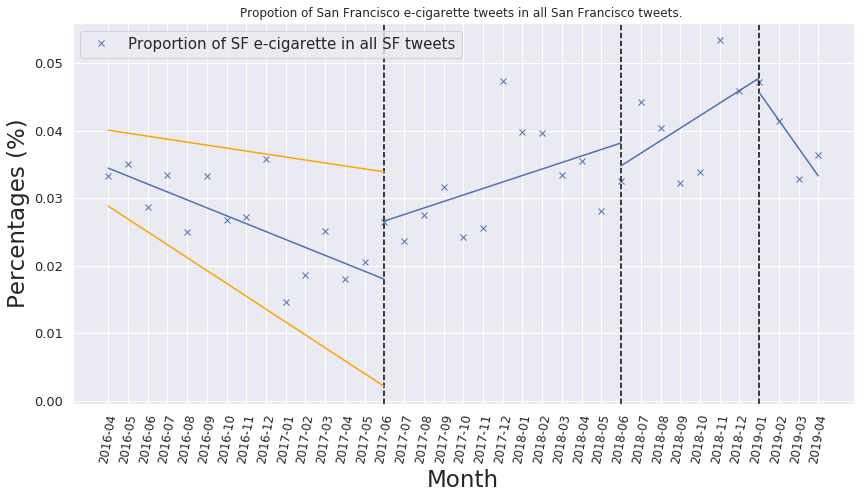

In [155]:
plt.figure(figsize=(14,7))

plt.plot(x, propotion_SF_ecig_in_all_SF_tweets, 'bx', label='Proportion of SF e-cigarette in all SF tweets')

plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,0.1))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,0.1))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,0.1))

print('**************************************************************')
drawRegressionLine_four_section(propotion_SF_ecig_in_all_SF_tweets, color='b')
plt.rc('legend', fontsize=15)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentages (%)', font_setting)
plt.title('Propotion of San Francisco e-cigarette tweets in all San Francisco tweets. ')
# plt.figure(figsize=(40,1))
plt.show()

[0.47194661 0.64282927 0.6887324  0.74668203 0.39824661 0.15839867
 0.03630675 0.42615159 0.00332496 0.41210418 0.63593347 0.27339775
 0.31604525 0.33916709 0.8360514  0.99373078 0.30996233 0.50111028
 0.48428301 0.97872792 0.23124298 0.33403596 0.0740315  0.32099974
 0.4013746  0.86305044 0.90971339 0.9455449  0.07679895 0.52351662
 0.01057374 0.23566057 0.40119    0.2110155  0.14172533 0.77437834
 0.85781672 0.86051065 0.16464837 0.31021402 0.9784871  0.66943983
 0.40502131 0.97659666 0.0664038  0.01843483 0.47705182 0.2327346
 0.00801462 0.21906012]
[2.01113633 2.99842727 2.30412753 2.2408239  2.10449603 2.82567426
 2.38206004 2.83944816 2.90323879 2.52778079 2.16605371 2.38203609
 2.15155904 2.69194805 2.46839138 2.78433136 2.15321985 2.91498869
 2.97573659 2.28547941 2.7582294  2.60583776 2.8372336  2.62489957
 2.98901869 2.57616356 2.68841396 2.38502126 2.29168267 2.9108748
 2.10869196 2.28739105 2.96628446 2.87141287 2.96756103 2.82086521
 2.82579873 2.05543611 2.56825529 2.0365

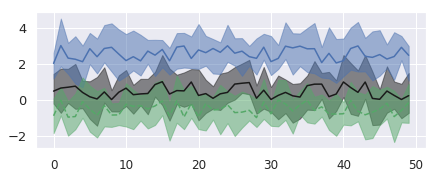

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
 
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    print(mean)
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)
 
# generate 3 sets of random means and confidence intervals to plot
mean0 = np.random.random(50)
ub0 = mean0 + np.random.random(50) + .5
lb0 = mean0 - np.random.random(50) - .5
 
mean1 = np.random.random(50) + 2
ub1 = mean1 + np.random.random(50) + .5
lb1 = mean1 - np.random.random(50) - .5
 
mean2 = np.random.random(50) -1
ub2 = mean2 + np.random.random(50) + .5
lb2 = mean2 - np.random.random(50) - .5
 
# plot the data
fig = plt.figure(1, figsize=(7, 2.5))
plot_mean_and_CI(mean0, ub0, lb0, color_mean='k', color_shading='k')
plot_mean_and_CI(mean1, ub1, lb1, color_mean='b', color_shading='b')
plot_mean_and_CI(mean2, ub2, lb2, color_mean='g--', color_shading='g')
 

length of p_y:  8
length of p_x:  7
n:  8
confs:  [2.17352797 1.73539376 1.4073393  1.27720828 1.40127184 1.72554608
 2.16173552]
length of confs:  7
length of lower:  7


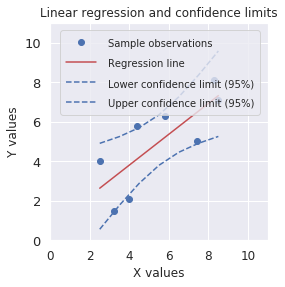

In [56]:
# References:
# - Statistics in Geography by David Ebdon (ISBN: 978-0631136880)
# - Reliability Engineering Resource Website:
# - http://www.weibull.com/DOEWeb/confidence_intervals_in_simple_linear_regression.htm
# - University of Glascow, Department of Statistics:
# - http://www.stats.gla.ac.uk/steps/glossary/confidence_intervals.html#conflim
 
import numpy as np
import matplotlib.pyplot as plt
 
# example data
x = np.array([4.0,2.5,3.2,5.8,7.4,4.4,8.3,8.5])
y = np.array([2.1,4.0,1.5,6.3,5.0,5.8,8.1,7.1])
 
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)
fit = p(x)
 
# get the coordinates for the fit curve
c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]
print('length of p_y: ', len(p_y))

# calculate the y-error (residuals)
y_err = y -p_y
 
# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)
print('length of p_x: ', len(p_x))
 
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)         # mean of x
n = len(x)              # number of samples in origional fit
print('n: ', n)
t = 2.31                # appropriate t value (where n=9, two tailed 95%)
s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals
 
confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
            ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))

print('confs: ', confs)
print('length of confs: ', len(confs))

# now predict y based on test x-values
p_y = z[0]*p_x+z[0]
 
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - abs(confs)
upper = p_y + abs(confs)
print('length of lower: ', len(lower))

# set-up the plot
plt.axes().set_aspect('equal')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'bo',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')
 
# set coordinate limits
plt.xlim(0,11)
plt.ylim(0,11)
 
# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
 
# show the plot
plt.show()

## Tobacco

In [48]:
SF_tobacco = [907,930,974,899,888,710,775, 731,663,626,571,619,588,570,580,665,721,349,656,662,485,550,554,604,647,583,593,606,627, 613, 486, 701, 556, 606, 620, 487, 534]
print('length of SF_tobacco: ', len(SF_tobacco))

propotion_SF_tobacco_in_all_SF_tweets = []
# propotion of SF e-cig tweets in all SF tweets.
for i in range(37):
    propotion_SF_tobacco_in_all_SF_tweets.append((SF_tobacco[i]/allSF_total[i])*100)
print('length of propotion_SF_tobacco_in_all_SF_tweets: ', len(propotion_SF_tobacco_in_all_SF_tweets))

length of SF_tobacco:  37
length of propotion_SF_tobacco_in_all_SF_tweets:  37


**************************************************************
Mean value in different stage:  [0.19, 0.22, 0.22, 0.22]
slope:  [-0.004867543319629908, -0.0006701895499359178, 0.0041860514337837, -0.005624557576954237]
intercept:  [0.22152741404455978, 0.23134876717175334, 0.10225009317244282, 0.41716077926708506]
R^2:  [0.7121995527769625, 0.004408651030581856, 0.16107057644826528, 0.2381197287997282]
t-test: 
slope- T value:  [-4.733308496172377, -3.3323241503861865, 4.041041056558934]
slope- p value:  [8.18136311782193e-05, 0.002238174267225169, 0.0002772017584575142]
intercept- T value:  [-0.5806805826415296, 3.8524911769332366, -4.284714959604136]
intercept- p value:  [0.5668689717572825, 0.0005494833512574399, 0.00013596515877953953]



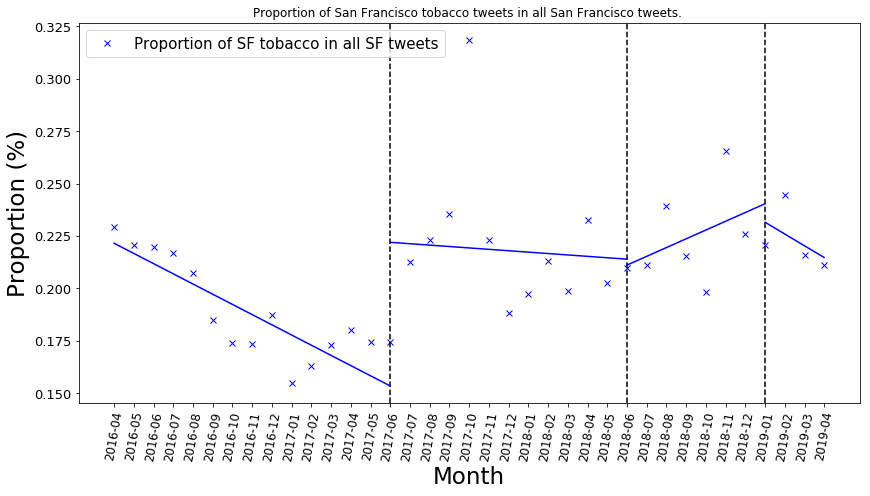

In [10]:
plt.figure(figsize=(14,7))



plt.plot(x, propotion_SF_tobacco_in_all_SF_tweets, 'bx', label='Proportion of SF tobacco in all SF tweets')

plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,0.1))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,0.1))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,0.1))

print('**************************************************************')
drawRegressionLine_four_section(propotion_SF_tobacco_in_all_SF_tweets, color='b')

plt.rc('legend', fontsize=15)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month',font_setting)
plt.ylabel('Percentages (%)',font_setting)
plt.title('Proportion of San Francisco tobacco tweets in all San Francisco tweets. ')
# plt.figure(figsize=(40,1))
plt.show()

## Flavored tobacco

In [11]:
SF_flavored_tobacco = [97, 77, 69, 85, 75, 71, 62, 45, 57, 61, 52, 53, 56, 60, 44, 42, 56, 35, 27, 51, 31, 44, 45, 40, 35, 32, 38, 51, 54, 56, 40, 38, 33, 42, 36, 48, 43]
print('length of SF_flavored_tobacco: ', len(SF_flavored_tobacco))

# propotion of SF flavored tobacco tweets in all tobacco tweets.
propotion_SF_flavored_tobacco_in_all_tobacco_tweets = []
for i in range(37):
    propotion_SF_flavored_tobacco_in_all_tobacco_tweets.append((SF_flavored_tobacco[i]/SF_tobacco[i])*100)
print('length of propotion_SF_flavored_tobacco_in_all_tobacco_tweets: ', len(propotion_SF_flavored_tobacco_in_all_tobacco_tweets))

length of SF_flavored_tobacco:  37
length of propotion_SF_flavored_tobacco_in_all_tobacco_tweets:  37


**************************************************************
Mean value in different stage:  [8.87, 6.96, 7.45, 7.66]
slope:  [0.050119403439651156, -0.13436146339501676, -0.27823370769793776, 0.7415035383632393]
intercept:  [8.543941703562435, 9.5827874849014, 15.519964344228086, -17.920411580388837]
R^2:  [0.027278595648602133, 0.09577025649143167, 0.16382234755975988, 0.30733456654489166]
t-test: 
slope- T value:  [4.306839310692394, 1.982650307703602, -5.439919966031361]
slope- p value:  [0.00024205694170559378, 0.05632855220570524, 4.229764264338048e-06]
intercept- T value:  [-1.4536015722821403, -3.2579923245072853, 5.66454675362943]
intercept- p value:  [0.15900920677425012, 0.0027207114835132093, 2.137726396739628e-06]



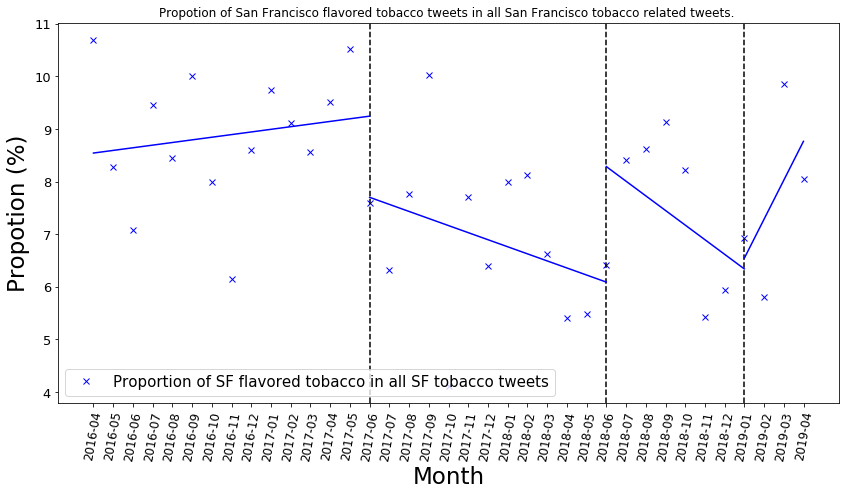

In [12]:
plt.figure(figsize=(14,7))


plt.plot(x, propotion_SF_flavored_tobacco_in_all_tobacco_tweets, 'bx', label='Proportion of SF flavored tobacco in all SF tobacco tweets')

plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,0.1))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,0.1))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,0.1))

print('**************************************************************')
drawRegressionLine_four_section(propotion_SF_flavored_tobacco_in_all_tobacco_tweets, color='b')
plt.rc('legend', fontsize=15)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentages (%)', font_setting)
plt.title('Propotion of San Francisco flavored tobacco tweets in all San Francisco tobacco related tweets. ')
# plt.figure(figsize=(40,1))
plt.show()

In [15]:
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np

def CI_printout(series, interval = 0.95, method = 't'):
    mean_val = series.mean()
    n = series.count()
    stdev = series.std()
    if method == 't':
        test_stat = stats.t.ppf((interval + 1)/2, n)
    elif method == 'z':
        test_stat = stats.norm.ppf((interval + 1)/2)
    lower_bound = mean_val - test_stat * stdev / math.sqrt(n)
    upper_bound = mean_val + test_stat * stdev / math.sqrt(n)

    fig = plt.figure()
    plt.axis('off')
    plt.gcf().set_size_inches(8, 2)
    plt.xticks([])
    plt.yticks([])

    plt.text(.5, .75, str(round(interval * 100))+ '% Confidence Interval', fontsize=25, color='black', ha='center')
    plt.text(.5, .35, str(round(lower_bound[0],2)) + ' to ' + str(round(upper_bound[0],2)), fontsize=25, color='black', ha='center')

    return plt

# Use Periscope to visualize a dataframe or an image by passing data to periscope.output()
periscope.output(CI_printout(df))

NameError: name 'periscope' is not defined